# Table of Contents
 <p>

In [1]:
library(tidyverse)
library(lubridate)
library(scales)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages -----------------------------------------------------------------------------------------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following objects are masked from ‘package:readr’:

    col_factor, col_numeric



In [2]:
theme_set(theme_bw())

In [54]:
options(repr.plot.width=4, repr.plot.height=3)

In [4]:
ratings <- read_csv('ratings.csv', col_names = c('user', 'movie','rating','ts'))
head(ratings)

user,movie,rating,ts
1,122,5,838985046
1,185,5,838983525
1,231,5,838983392
1,292,5,838983421
1,316,5,838983392
1,329,5,838983392


In [5]:
movies <- read_delim('movies.tsv', delim = "\t", col_names = c('movie','title', 'genres'), quote = "")
head(movies)

movie,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


In [6]:
ratings <- ratings %>%
    mutate(ts = as.POSIXct(ts, origin='1970-01-01', tz='GMT'),
           ymd = as.Date(ts))

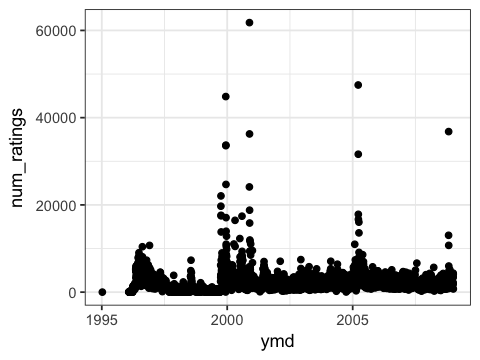

In [7]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_point()

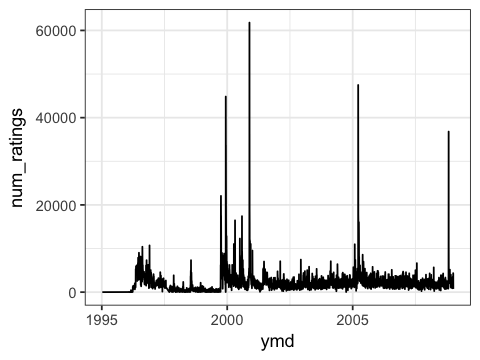

In [8]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line()

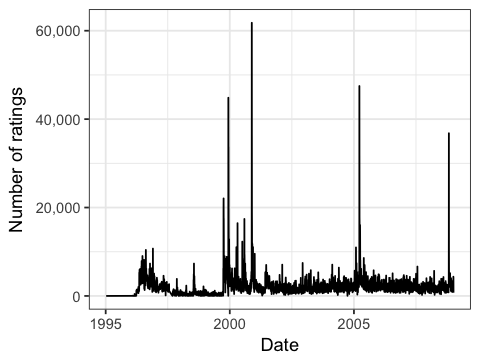

In [9]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_continuous(label = comma) +
        xlab('Date') +
        ylab('Number of ratings')

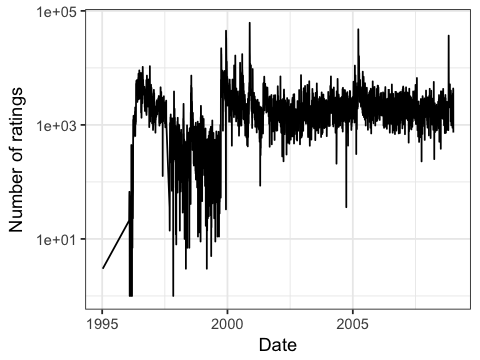

In [10]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10() +
        xlab('Date') +
        ylab('Number of ratings')

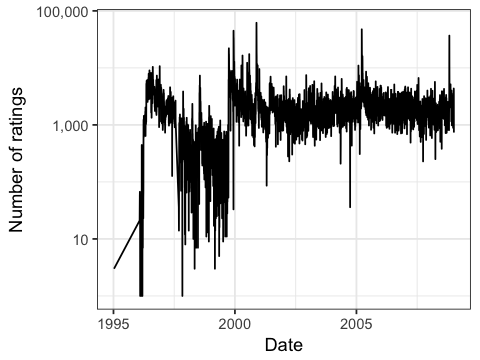

In [11]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma) +
        xlab('Date') +
        ylab('Number of ratings')

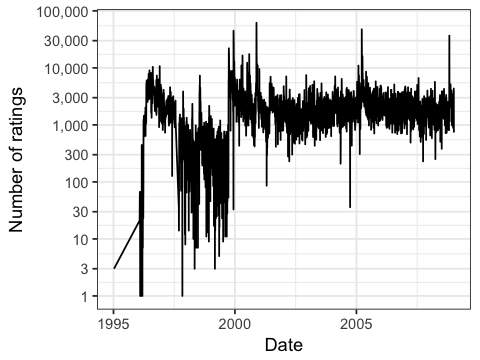

In [12]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma, breaks = c(1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5)) +
        xlab('Date') +
        ylab('Number of ratings')

In [13]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    filter(num_ratings > 30e3)

ymd,num_ratings
1999-12-11,44838
1999-12-12,33579
1999-12-13,33701
2000-11-20,61793
2000-11-21,36271
2005-03-22,47488
2005-03-23,31618
2008-10-29,36808


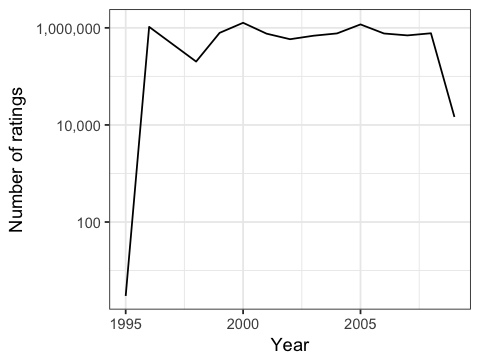

In [14]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

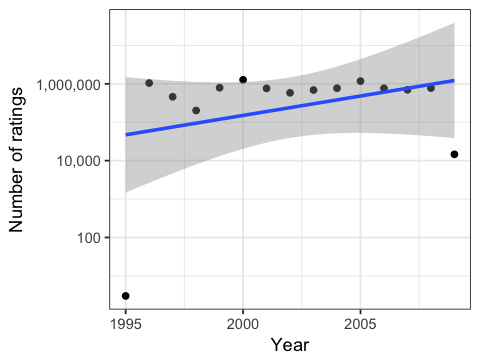

In [15]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

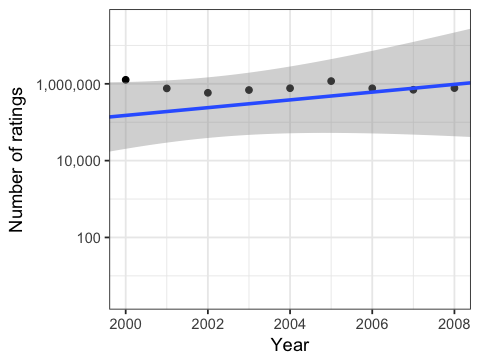

In [16]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        coord_cartesian(xlim = c(2000, 2008)) +
        xlab('Year') +
        ylab('Number of ratings')

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

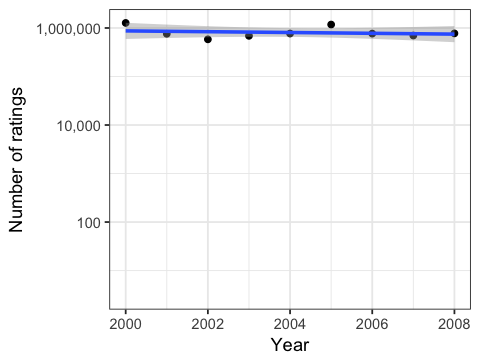

In [17]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlim(c(2000, 2008)) +
        xlab('Year') +
        ylab('Number of ratings')

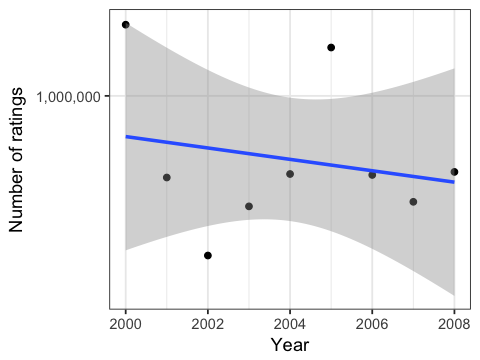

In [18]:
ratings %>%
    group_by(year = year(ts)) %>%
    filter(year >= 2000, year <= 2008) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

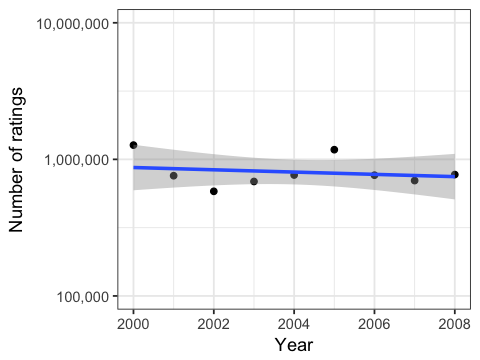

In [19]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlim(c(2000, 2008)) +
        coord_cartesian(ylim = c(1e5, 1e7)) +
        xlab('Year') +
        ylab('Number of ratings')

In [20]:
ratings_by_movie <- ratings %>%
    group_by(movie) %>%
    summarize(num_ratings = n(),
              mean_rating = mean(rating),
              se_rating = sd(rating) / sqrt(n())) %>%
    arrange(desc(num_ratings)) %>%
    ungroup()
head(ratings_by_movie)

movie,num_ratings,mean_rating,se_rating
296,34864,4.157426,0.005369043
356,34457,4.013582,0.005217213
593,33668,4.204200,0.004568511
480,32631,3.661564,0.005195836
318,31126,4.457238,0.004059660
110,29154,4.082390,0.005578202


In [21]:
ratings_by_movie <- ratings_by_movie %>%
    left_join(movies) %>%
    select(-genres)
head(ratings_by_movie)

Joining, by = "movie"


movie,num_ratings,mean_rating,se_rating,title
296,34864,4.157426,0.005369043,Pulp Fiction (1994)
356,34457,4.013582,0.005217213,Forrest Gump (1994)
593,33668,4.204200,0.004568511,"Silence of the Lambs, The (1991)"
480,32631,3.661564,0.005195836,Jurassic Park (1993)
318,31126,4.457238,0.004059660,"Shawshank Redemption, The (1994)"
110,29154,4.082390,0.005578202,Braveheart (1995)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


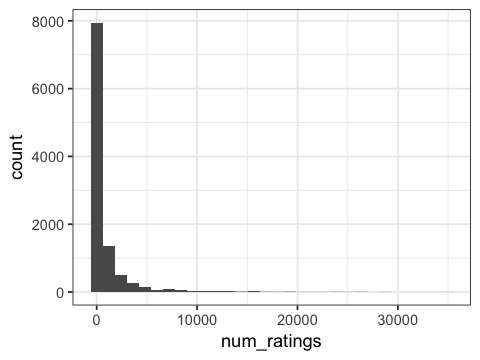

In [22]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram()

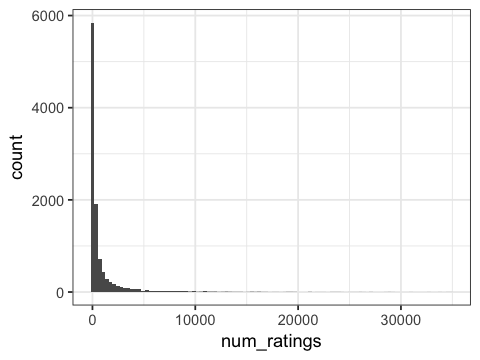

In [23]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram(bins = 100)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


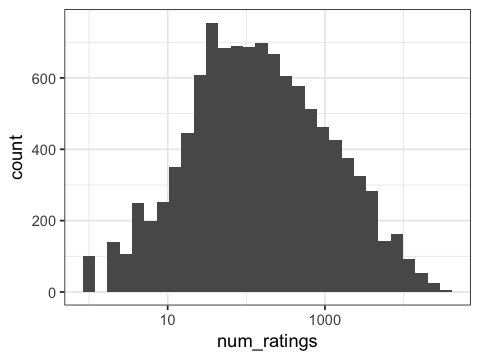

In [24]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram() +
    scale_x_log10()

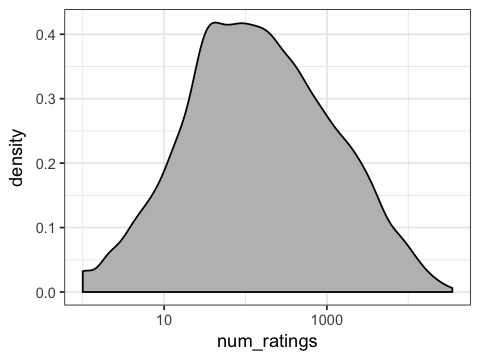

In [25]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10()

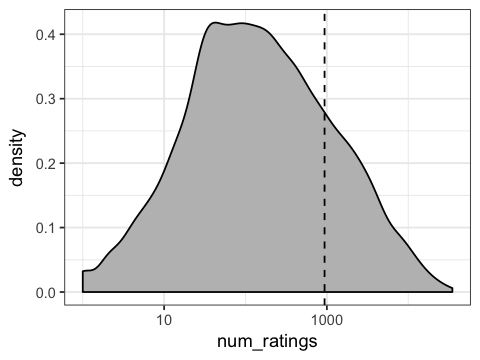

In [26]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10() +
    geom_vline(aes(xintercept = mean(num_ratings)), linetype = "dashed")

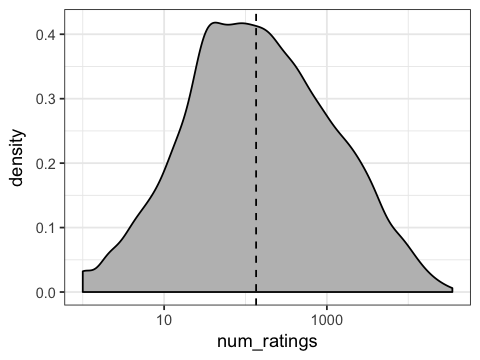

In [27]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10() +
    geom_vline(aes(xintercept = median(num_ratings)), linetype = "dashed")

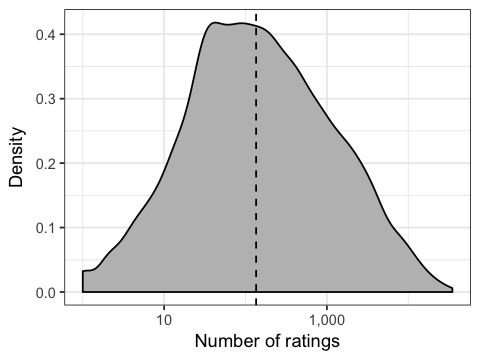

In [28]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10(label = comma) +
    geom_vline(aes(xintercept = median(num_ratings)), linetype = "dashed") +
    xlab('Number of ratings') +
    ylab('Density')

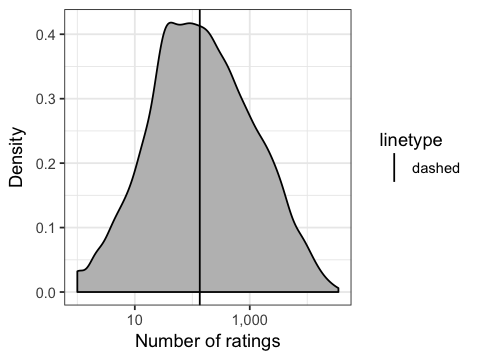

In [29]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10(label = comma) +
    geom_vline(aes(xintercept = median(num_ratings), linetype = "dashed")) +
    xlab('Number of ratings') +
    ylab('Density')

In [30]:
ratings_by_movie <- ratings_by_movie %>%
    ungroup() %>%
    mutate(rank = rank(desc(num_ratings)))
head(ratings_by_movie)

movie,num_ratings,mean_rating,se_rating,title,rank
296,34864,4.157426,0.005369043,Pulp Fiction (1994),1
356,34457,4.013582,0.005217213,Forrest Gump (1994),2
593,33668,4.204200,0.004568511,"Silence of the Lambs, The (1991)",3
480,32631,3.661564,0.005195836,Jurassic Park (1993),4
318,31126,4.457238,0.004059660,"Shawshank Redemption, The (1994)",5
110,29154,4.082390,0.005578202,Braveheart (1995),6


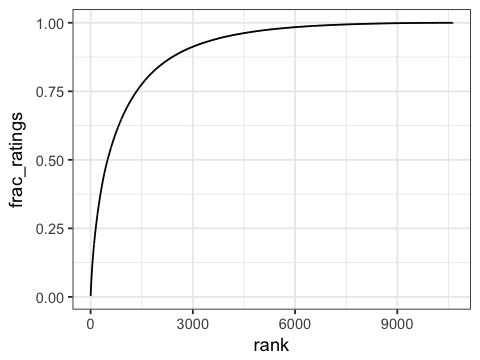

In [31]:
ratings_by_movie %>%
    mutate(frac_ratings = cumsum(num_ratings) / sum(num_ratings)) %>%
    ggplot(aes(x = rank, y = frac_ratings)) +
    geom_line()

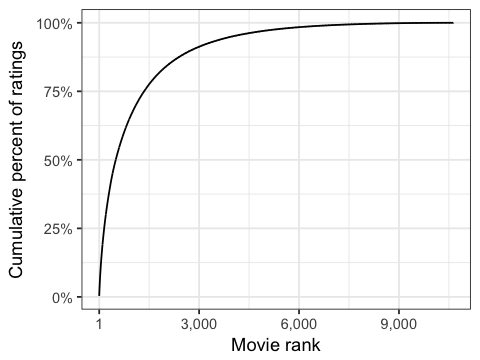

In [32]:
ratings_by_movie %>%
    mutate(frac_ratings = cumsum(num_ratings) / sum(num_ratings)) %>%
    ggplot(aes(x = rank, y = frac_ratings)) +
    geom_line() +
    scale_x_continuous(label = comma, breaks = c(1, 3e3, 6e3, 9e3)) +
    scale_y_continuous(label = percent) +
    xlab('Movie rank') +
    ylab('Cumulative percent of ratings')

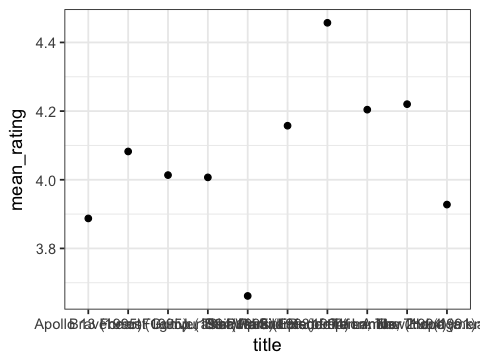

In [57]:
ratings_by_movie %>%
    slice(1:10) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_point()

In [61]:
options(repr.plot.width=6, repr.plot.height=3)

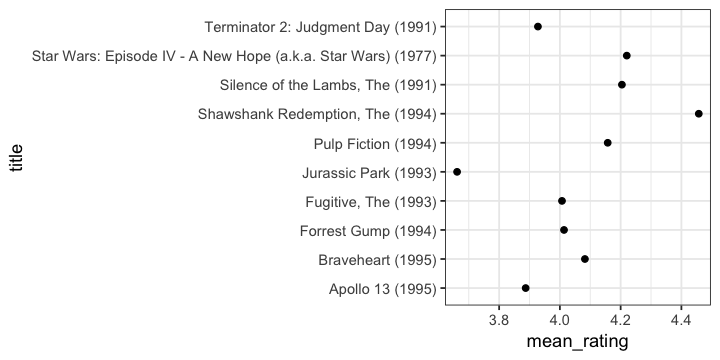

In [62]:
ratings_by_movie %>%
    slice(1:10) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_point() +
    coord_flip()

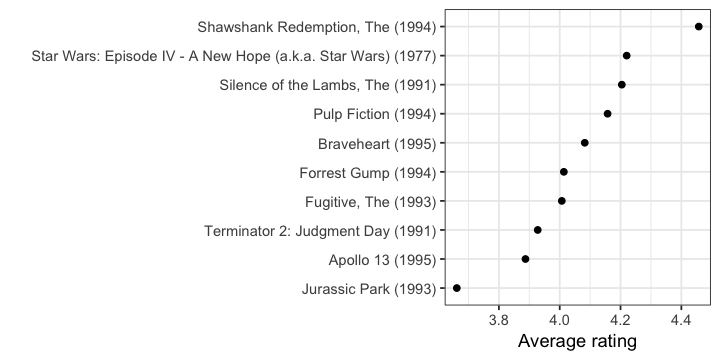

In [81]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(1:10) %>%
    ggplot(aes(x = mean_rating, y = title)) +
    geom_point() +
    xlab('Average rating') +
    ylab('')

In [78]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(10050:10060)

movie,num_ratings,mean_rating,se_rating,title,rank
33113,6,3.833333,0.2788867,Act of Violence (1948),10035.5
33340,6,3.750000,0.1118034,Kids Return (Kizzu ritân) (1996),10035.5
33629,6,3.166667,0.2788867,Airborne (1993),10035.5
33641,6,3.333333,0.3073181,Tell Them Who You Are (2004),10035.5
34189,6,1.833333,0.3574602,Twin Sitters (1994),10035.5
34526,6,2.666667,0.3574602,Secuestro Express (2004),10035.5
36541,6,2.166667,0.5868939,HellBent (2004),10035.5
37287,6,3.083333,0.4901814,Gertrud (1964),10035.5
37335,6,3.666667,0.2108185,Come Drink with Me (Da zui xia) (1966),10035.5
40752,6,2.583333,0.5230785,Takeshis' (2005),10035.5


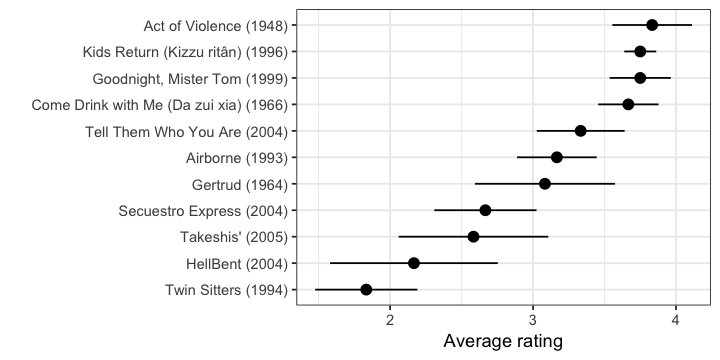

In [83]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(10050:10060) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_pointrange(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating)) +
    xlab('') +
    ylab('Average rating') +
    coord_flip()

In [44]:
ratings_by_movie %>%
    select(movie, title, rank) %>%
    slice(1:5)

movie,title,rank
296,Pulp Fiction (1994),1
356,Forrest Gump (1994),2
593,"Silence of the Lambs, The (1991)",3
480,Jurassic Park (1993),4
318,"Shawshank Redemption, The (1994)",5


In [38]:
top_ratings <- ratings_by_movie %>%
    select(movie, title, rank) %>%
    slice(1:10) %>%
    inner_join(ratings)
head(top_ratings)
tail(top_ratings)

Joining, by = "movie"


movie,title,rank,user,rating,ts,ymd
296,Pulp Fiction (1994),1,10,2,1999-11-02 08:04:24,1999-11-02
296,Pulp Fiction (1994),1,11,3,1999-12-24 05:08:25,1999-12-24
296,Pulp Fiction (1994),1,13,4,2002-10-21 16:40:06,2002-10-21
296,Pulp Fiction (1994),1,18,5,2005-03-23 02:44:55,2005-03-23
296,Pulp Fiction (1994),1,22,5,1996-08-02 10:54:37,1996-08-02
296,Pulp Fiction (1994),1,23,4,1996-12-02 16:28:03,1996-12-02


movie,title,rank,user,rating,ts,ymd
150,Apollo 13 (1995),10,71554,5,1996-10-04 08:04:01,1996-10-04
150,Apollo 13 (1995),10,71557,3,2005-12-03 00:04:56,2005-12-03
150,Apollo 13 (1995),10,71558,4,2000-06-01 20:02:46,2000-06-01
150,Apollo 13 (1995),10,71560,4,1996-08-02 10:49:51,1996-08-02
150,Apollo 13 (1995),10,71562,4,2008-07-20 16:34:23,2008-07-20
150,Apollo 13 (1995),10,71566,5,1996-04-24 10:13:21,1996-04-24


In [51]:
plot_data <- top_ratings %>%
    group_by(rank, movie, title, year = year(ymd)) %>%
    summarize(num_ratings = n(),
              mean_rating = mean(rating))
head(plot_data)

rank,movie,title,year,num_ratings,mean_rating
1,296,Pulp Fiction (1994),1996,12076,4.018632
1,296,Pulp Fiction (1994),1997,1356,4.233776
1,296,Pulp Fiction (1994),1998,717,4.099024
1,296,Pulp Fiction (1994),1999,2678,4.236370
1,296,Pulp Fiction (1994),2000,2849,4.247104
1,296,Pulp Fiction (1994),2001,1608,4.235697


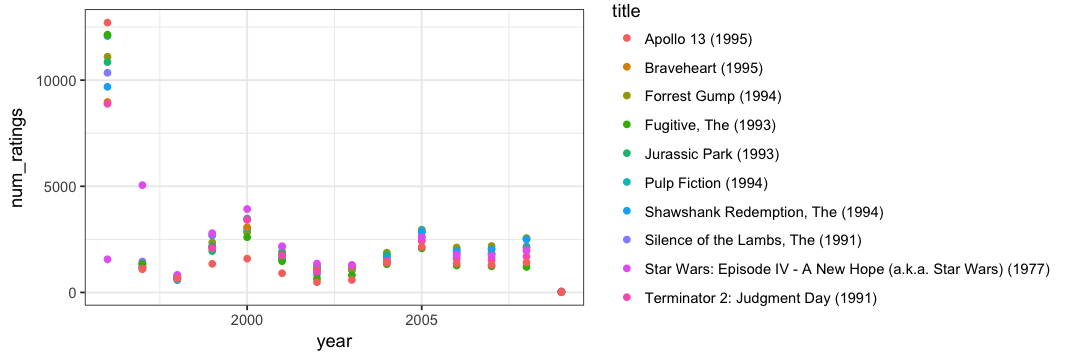

In [50]:
ggplot(plot_data, aes(x = year, y = num_ratings, color = title)) +
    geom_point()